# Loading the necessary Data

In [182]:
import os
from pathlib import Path
import pandas as pd

DirPpath = Path(os.path.abspath('')).parent # Fetching the current directory path - Specific for ipynb file - For .py: Path(os.path.dirname(os.path.realpath(__file__)).replace("\\", "/"))

IndexedPath  = str(DirPpath.absolute()) + "\IndexedDataV1.csv"
IndexedData = pd.read_csv(IndexedPath, index_col=0)  

IndexedData.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.013142,-0.005393,0.003257,0.056500,-0.066874,-0.007067,0.071114,-0.065270,0.079788,0.015576,...,-0.081252,0.065590,-0.048398,0.016517,-0.033914,0.006824,0.014629,-0.000418,0.024501,-0.024090
1,-0.048643,-0.014483,0.023257,0.047647,-0.057496,-0.070403,0.074411,-0.057833,0.097528,-0.007923,...,-0.076494,0.032301,-0.018236,0.008295,-0.032173,0.039009,0.000832,-0.018247,0.012471,-0.046993
2,-0.059451,0.016295,-0.009575,0.053909,-0.062166,-0.057420,0.070133,-0.069739,0.045755,-0.006367,...,-0.057836,0.052784,-0.039320,0.044331,-0.022752,0.002986,-0.027889,-0.014938,-0.009718,-0.016294
3,-0.020408,0.020211,0.010050,0.158275,-0.131538,-0.015283,0.118447,-0.042358,0.058998,0.048031,...,-0.115546,0.058831,0.008369,0.025403,-0.028008,0.049138,0.035290,-0.030962,0.029652,0.018936
4,0.004635,0.031372,0.012232,0.042264,-0.084437,0.003607,0.073191,-0.047960,0.108107,0.044776,...,-0.063270,0.077579,-0.058040,0.011643,-0.008201,0.036807,-0.004209,-0.027520,0.031066,-0.073543


In [183]:
# Load the Topic column from the preprocessed data
DirPpath = Path(os.path.abspath('')).parent # Fetching the current directory path - Specific for ipynb file - For .py: Path(os.path.dirname(os.path.realpath(__file__)).replace("\\", "/"))
PreprocessedPath  = str(DirPpath.absolute()) + "\PreProcessedData.csv"  
Topics = pd.read_csv(PreprocessedPath, index_col=0)

IndexedData["Topic"] = Topics["Topic"].values # Adding a Topic column to the IndexedData dataframe

# Plotting number of pledges by topic v2

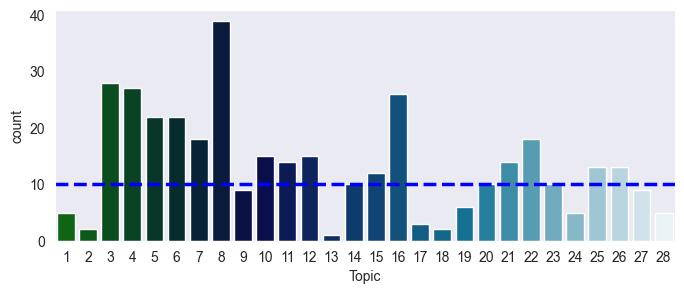

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n = IndexedData.groupby("Topic").size()

test2 = n.values

# To add if some topics are missing
# test2 = np.insert(test2, 12, 0)
# test2 = np.insert(test2, 23, 0)
# pd.Series(range(1,29))

plotdf = pd.DataFrame()
plotdf["Topic"] = pd.Series(range(1,29))
plotdf["count"] = test2

plt.figure(figsize=(8,3)) 
sns.set_style("dark") # Building a catplot of the number of pledges per topic
graph = sns.barplot(data=plotdf, x="Topic", y="count", palette = "ocean")
#plt.title("Frequency showing number of pledges assigned in different topics", size = 20, y = 0.8)
plt.axhline(y=10, color='blue', ls='--', lw=2.5) # Adding a mean line
plt.show()

# Dimensionality reduction - t-SNE

###### Rem: PCA = uneffective, only 30% of explained variance with the 2 first components

In [184]:
from sklearn.manifold import TSNE
results = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(IndexedData.loc[:, IndexedData.columns != "Topic"])

# Building a new df for better visualization of t-SNE results
df = pd.DataFrame()
df["Topic"] = IndexedData["Topic"].values
df["Y1"] = results[:,0]
df["Y2"] = results[:,1]

Special visual for pres

In [ ]:
#153
# 57, 149, 150, 151, 152, 156
from wordcloud import WordCloud # For plotting wordclouds

liste = [60, 157, 158, 159, 160, 164]
cluster = Topics['PreProcessedText'][Topics['PreProcessedText'].index.isin(liste)]
outlier = Topics['PreProcessedText'][161]


cloud=WordCloud(colormap="ocean_r",width=600,height=400, background_color="#e5e5e5").generate(cluster.str.cat(sep=' '))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.show()

cloud=WordCloud(colormap="ocean_r",width=600,height=400, background_color="#e5e5e5").generate(outlier)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.show()

# Clustering - Visuals

### Global

#### 1° t-SNE plot

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_17092\4098781411.py:15: UserWarning: 
The palette list has fewer values (10) than needed (28) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


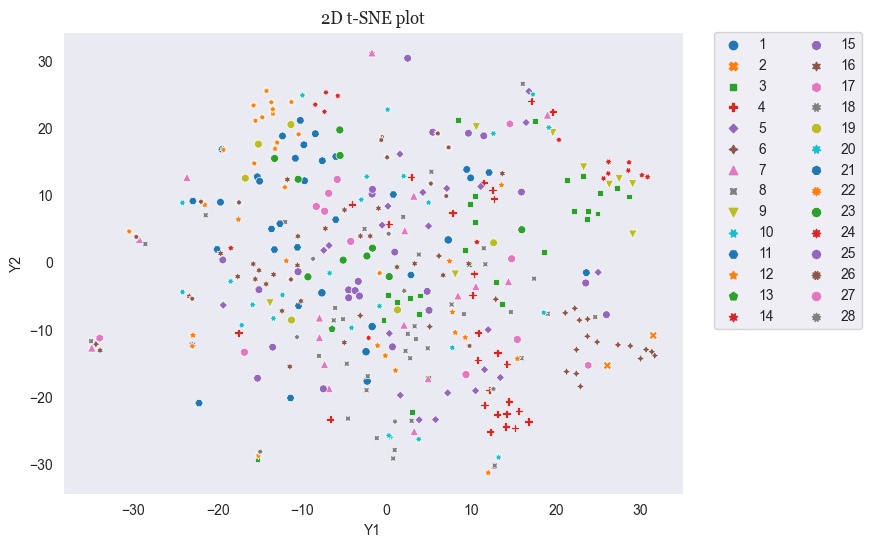

In [118]:
#for i in range(3,50,2): # If you want to test different levels of perplexity => replace perplexity = 15 by perplexity = i => loop over different values   

results = TSNE(n_components=2, random_state=0, perplexity=15, n_iter=5000).fit_transform(IndexedData.loc[:, IndexedData.columns != "Topic"])

# Building a new df for better visualization of t-SNE results
df = pd.DataFrame()
df["Topic"] = IndexedData["Topic"].values
df["Y1"] = results[:,0]
df["Y2"] = results[:,1]
# Building a scatter plot for the t-SNE results
csfont = {'fontname':'Arial'} # setting font for axis labels
hfont = {'fontname':'Georgia'} # setting font for title

plt.figure(figsize=(8,6)) # setting size of the graph
sns.scatterplot(

    x="Y1", y="Y2", # Data to plot
    hue="Topic",  # Group by Topic
    palette=sns.color_palette(), # Apply a given color palette
    style = "Topic", # Ensure that each topic has a different style
    data=df, # Data source file
    legend="full", # Adding a legend
    
).set_title("2D t-SNE plot", fontdict = hfont) # Adding a title with the font hfont

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0, ncol = 2) # Placing the legend on the graph
plt.show()


###### Outliers

In [ ]:
from scipy.stats import multivariate_normal
import numpy as np
from scipy.stats import chi2
from matplotlib import patches

data = df.loc[:, df.columns != "Topic"].to_numpy()

#calculate the covariance matrix
covariance_matrix = np.cov(np.stack(data, axis=1))
cov_pm1 = np.linalg.matrix_power(covariance_matrix,-1)
centerpoint = np.mean(data, axis = 0)

distances = []
for i, val in enumerate(data):
    p1=val
    p2 = centerpoint
    distance = (p1-p2).T.dot(cov_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

cutoff = chi2.ppf(0.90, data.shape[1])

outliersIndexes = np.where(distances > cutoff)

print('--- Index of outliers ---')
print(outliersIndexes)

print('--- Observations found as outliers ---')
print(data[distances > cutoff, :])

pearson = covariance_matrix[0,1]/np.sqrt(covariance_matrix[0,0] * covariance_matrix[1,1])
ell_radius_x = np.sqrt(1 + pearson)
eli_radius_y = np.sqrt(1-pearson)

lambda_, v = np.linalg.eig(covariance_matrix)
lambda_ = np.sqrt(lambda_)

ellipse = patches.Ellipse(xy = (centerpoint[0], centerpoint[1]), width = lambda_[0]*np.sqrt(cutoff)*2, height = lambda_[1]*np.sqrt(cutoff)*2, angle = np.rad2deg(np.arccos(v[0,0])), edgecolor = "#fab1a0")
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(data[:, 0], data[:, 1])
plt.show()


#### 2° Elbow Graph and Dendrogram

c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

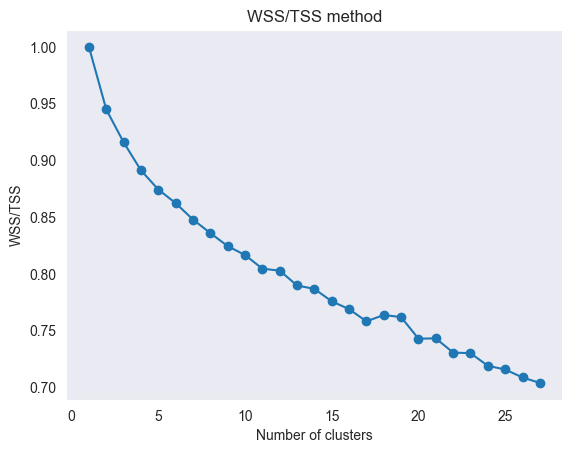

In [164]:
import numpy as np
import math
from sklearn.cluster import KMeans

x = np.array(IndexedData.loc[:, IndexedData.columns != "Topic"])
tss = []

for i in range(0,x.shape[0]):

    tss.append((math.dist(x[i,:], np.mean(x, axis = 0)))**2)

inertias = []

for i in range(1,28):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_ / sum(tss))

plt.plot(range(1,28), inertias, marker='o')
plt.title('WSS/TSS method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS/TSS')
plt.show()

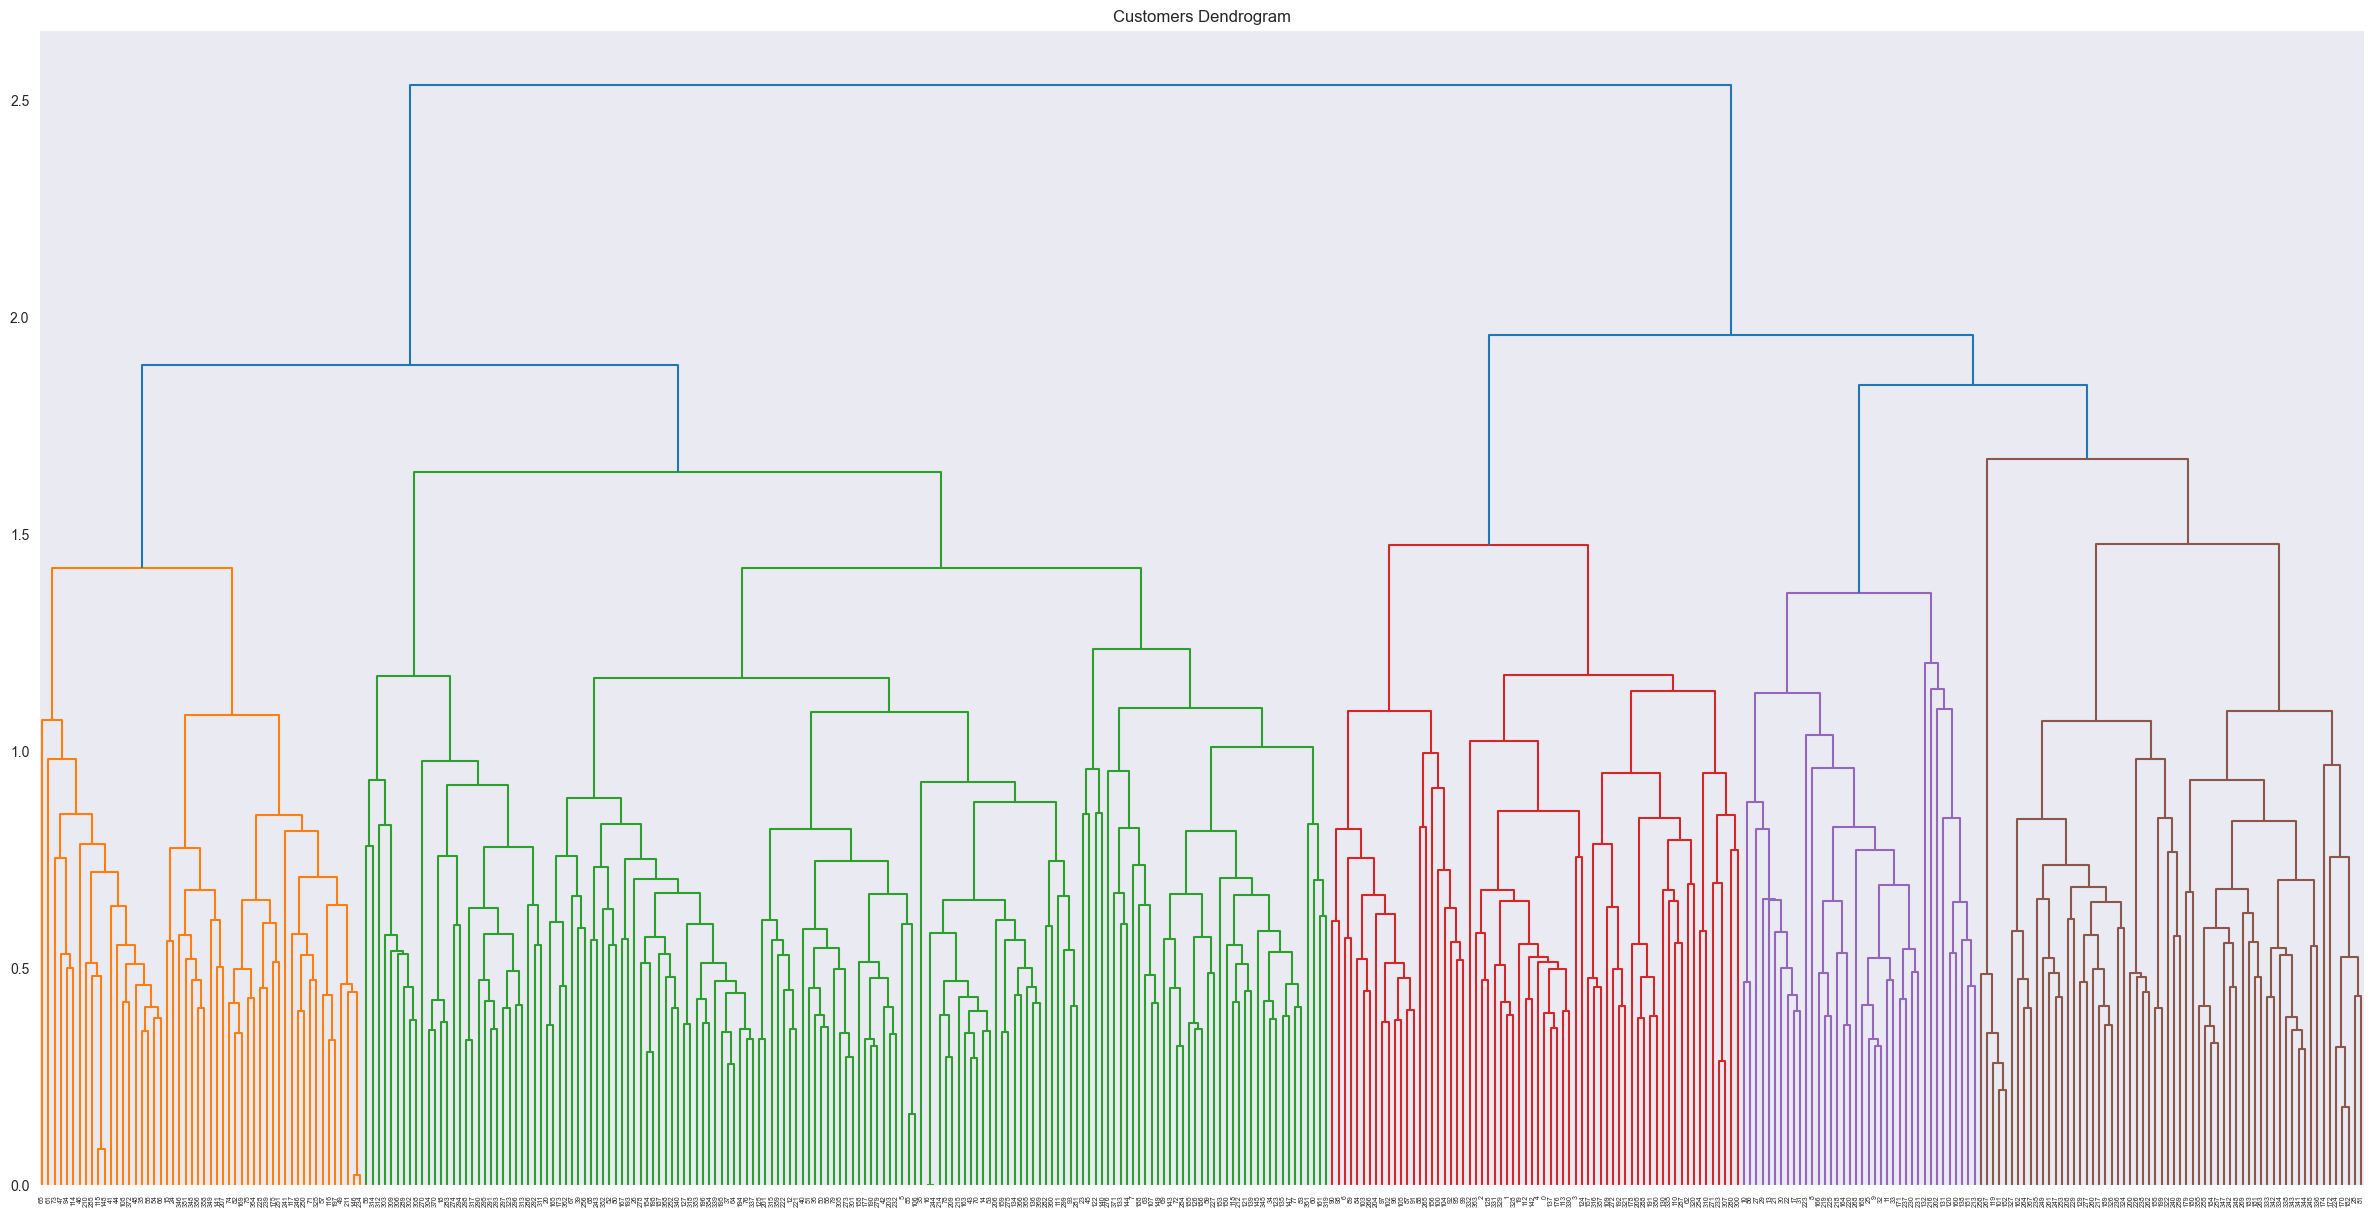

In [165]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = x
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

### Topic by Topic

#### 1° t-SNE

In [ ]:
# Creating a function for building tSNE plots
def tSNEPlot(x, topic):

    csfont = {'fontname':'Arial'} # Font name for labels
    hfont = {'fontname':'Georgia'} # Font name for title

    ax = plt.axes()
    ax.scatter(x["Y1"], x["Y2"], c="#d04a02", marker= "v") # Setting data to plot, color, and markers type
    ax.set_title("2D t-SNE plot of Topic " + str(topic), **hfont) # Defining a title and its format
    ax.set_ylabel("Y2", **csfont) # Defining y-label
    ax.set_ylim(-35,35) # Standardizing the scale of y axis
    ax.set_xlabel("Y1", **csfont) # Idem for x axis
    ax.set_xlim(-35,35)

    ax.set_facecolor((218 / 255, 222 / 255, 224 / 256)) # Formatting the background's color
    plt.grid(which='major', color='w', linestyle='-') # Adding a grid to the background
    ax.set_axisbelow(True)  # Formatting the axis style
    for spine in ax.spines:
        ax.spines[spine].set_color('white')

    plt.show()

# Applying the function on all Topic
df.groupby('Topic').apply(lambda x: tSNEPlot(x, x["Topic"].unique()))

#### 2° Elbow and Dendro

In [162]:
# Define WSS function
from statistics import variance
import numpy as np
import math

def WSS(data):


    x = np.array(data)
    wss = []

    for i in range(0,x.shape[0]):

        wss.append((math.dist(x[i,:], np.mean(x, axis = 0)))**2)

    return sum(wss)

def TSS(data):

    x = np.array(data)
    size = x.shape[0]
    tss = []

    for i in range(0,size):

        tss.append((math.dist(x[i,:], np.mean(x, axis = 0)))**2)

    return sum(tss)   

In [ ]:
# Creating function for dendrogram drawing
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

def Dendro(x):

    print("Dendrogram: \n")
    plt.figure(figsize=(30, 7))
    plt.title("Topics Dendrogram")

    # Selecting Annual Income and Spending Scores by index
    selected_data = x
    clusters = shc.linkage(selected_data, 
                method='ward', 
                metric="euclidean")
    shc.dendrogram(Z=clusters)
    plt.show()


# Creating function for building elbow method graphs
from sklearn.cluster import KMeans
import numpy as np

def ElbowGraph(x):

    print("Elbow Graph: \n")
    inertias = []
    size = np.array(x).shape[0]

    for i in range(1, size):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(x)
        inertias.append(kmeans.inertia_ / TSS(x))

    plt.plot(range(1,size), inertias, marker='o')
    plt.title('WSS/TSS method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WSS/TSS')
    plt.show()

# Graph Analysis function
def GraphAnalysis(x):

    print("Cluster Analysis of Topic: \n")

    ElbowGraph(x)
    Dendro(x)

IndexedData.groupby('Topic').apply(lambda x: GraphAnalysis(x) if np.array(x).shape[0]>2 else print("Less than two items in the topic"))

## Clustering - Algorithms

### Global

In [122]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [185]:
# Reminder of the data used
x = np.array(IndexedData.loc[:, IndexedData.columns != "Topic"])

In [167]:
def ClusterPlot(tsne, labels):
    df = pd.DataFrame()
    df["x"] = tsne[:,0]
    df["y"] = tsne[:,1]
    df["cluster"] = labels

    csfont = {'fontname':'Arial'} # setting font for axis labels
    hfont = {'fontname':'Georgia'} # setting font for title

    #plt.figure(figsize=(8.75,3)) # setting size of the graph
    sns.scatterplot(

        x="x", y="y", # Data to plot
        hue="cluster",  # Group by Topic
        palette=sns.color_palette(), # Apply a given color palette
        #style = "Topic", # Ensure that each topic has a different style
        data=df, # Data source file
        #legend="full", # Adding a legend
        
    ).set_title("2D t-SNE plot", fontdict = hfont) # Adding a title with the font hfont

    #plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0, ncol = 2) # Placing the legend on the graph
    plt.show()

Testing the results of k-means algo

c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_17092\2430742741.py:11: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(


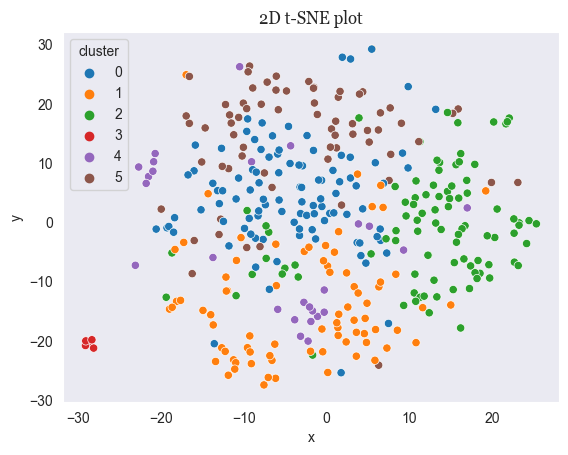

In [186]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(x)

y_km = kmeans.fit_predict(x)

ClusterPlot(results, kmeans.labels_)

In [169]:
import gensim
import gensim.downloader as api

#model = gensim.models.Word2Vec.load(str(DirPpath.absolute()) + "\Word2VecFt.model")
model = api.load('word2vec-google-news-300')

In [93]:
import nltk
tokens = [nltk.word_tokenize(i) for i in Topics["PreProcessedText"]]
tokens = [element for innerList in tokens for element in innerList]

In [ ]:
print("Most representative terms per cluster (based on centroids):")
for i in range(6):
    tokens_per_cluster = ""
    most_representative = model.most_similar(positive=[kmeans.cluster_centers_[i]], topn=100)
    for t in most_representative:

        if t[0] in tokens: 
            tokens_per_cluster += f"{t[0]} "

    print(f"Cluster {i}: {tokens_per_cluster}")

In [ ]:
# For tf-idf representation

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(analyzer='word')

tfidf_wm = tfidfvectorizer.fit_transform(Topics["PreProcessedText"])

tfidf_tokens = tfidfvectorizer.get_feature_names_out()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)

#df_tfidfvect["Topics"] = Topics["Topic"]
df_tfidfvect["Cluster"] = y_km

print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)


In [ ]:
from wordcloud import WordCloud

def wordcloudTfIdf(data, cluster):

    data = data.loc[:, data.columns != "Cluster"]
    data = data.T.mean(axis = 1)

    print("Cluster" + str(cluster))
    cloud=WordCloud(colormap="ocean_r",width=600,height=400, background_color="#e5e5e5", max_words=20, stopwords=["tourism", "tourist", "also", "across"]).generate_from_frequencies(data) # Setting color for the map, background + defining dimensions
    fig=plt.figure(figsize=(13,18)) # Size of the figure
    plt.axis("off") # Removing the axis
    plt.imshow(cloud,interpolation='bilinear')
    plt.show()

df_tfidfvect.groupby('Cluster').apply(lambda x: wordcloudTfIdf(x, x["Cluster"].unique()))


In [ ]:
# Most frequent words
from wordcloud import WordCloud

def wordcloud(data, cluster):

    print("Cluster" + str(cluster))
    cloud=WordCloud(colormap="ocean_r",width=600,height=400, background_color="#e5e5e5", max_words=20, stopwords=["tourism", "tourist", "also", "across"]).generate(data["PreProcessedText"].str.cat(sep=' ')) # Setting color for the map, background + defining dimensions
    fig=plt.figure(figsize=(13,18)) # Size of the figure
    plt.axis("off") # Removing the axis
    plt.imshow(cloud,interpolation='bilinear')
    plt.show()

CloudDf = pd.DataFrame()
CloudDf["PreProcessedText"] = Topics["PreProcessedText"]
CloudDf["Cluster"] = y_km

CloudDf.groupby('Cluster').apply(lambda x: wordcloud(x, x["Cluster"].unique()))

In [225]:
test_cluster = 0
most_representative_docs = np.argsort(
    np.linalg.norm(x - kmeans.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:3]:
    print(Topics["PreProcessedText"].iloc[d])
    print("-------------")

catalan tourism data system platform tds electronic platform online survey system allow manage analyze evolution activity accommodation compare global destination type accommodation brand tourist target next year would include expenditure data regional level system indicator tourism intelligence indicator system intucat approve index structure base area measurement refer environmental sustainability social sustainability economic sustainability tourism activity destination fourth area consider essential measurement achievement sustainable development goal sdgs target develop implement system intucat intellitur clear orientation towards data culture company catalonia promote platform client catalan tourist board ctb company catalan tourism sector find key information need regard product market platform within bb portal ctb consist two part one part quantitative information powerbi format virtual library document interest generate ctb information structure accord life cycle trip accord n

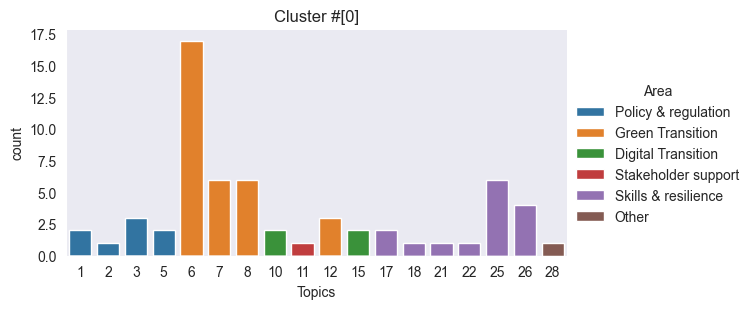

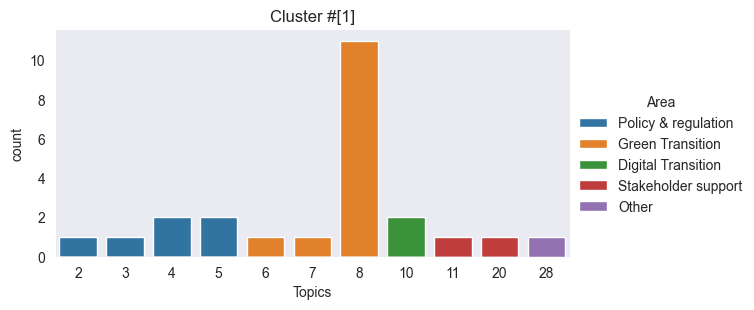

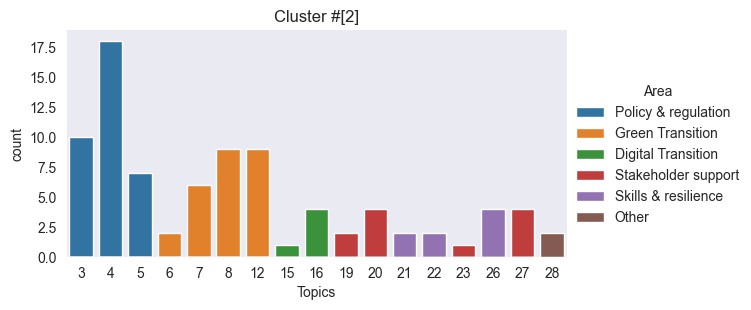

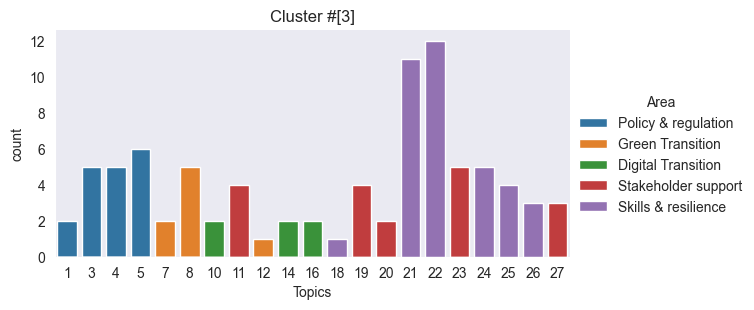

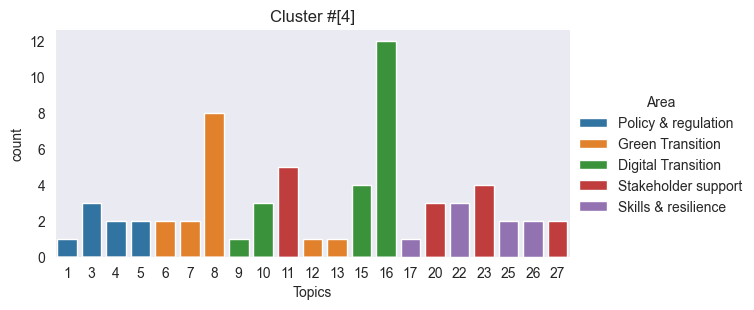

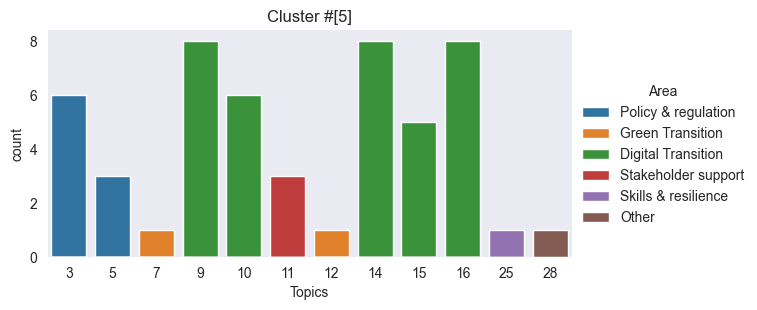

""


In [176]:
CloudDf["Topics"] = Topics["Topic"]

area1 = [1, 2, 3, 4, 5]
area2 = [6,7,8,12,13]
area3 = [9,10,14,15,16]
area4 = [11, 19,20,23,27]
area5 = [17,18,21,22,24,25,26]

areaList = []

for topic in CloudDf["Topics"]:

    if topic in area1:
        areaList.append("Policy & regulation")
    elif topic in area2: 
        areaList.append("Green Transition")
    elif topic in area3: 
        areaList.append("Digital Transition")
    elif topic in area4:
        areaList.append("Stakeholder support")
    elif topic in area5:
        areaList.append("Skills & resilience")
    else:
        areaList.append("Other")

CloudDf["Area"] = areaList

def plot_cluster(x, c):
    #x['Topics'].value_counts().plot(kind='bar', title="Cluster #{}".format(c))
    sns.set_style("dark") # Building a catplot of the number of pledges per topic
    graph = sns.catplot(data=x, x="Topics", kind="count", hue ="Area", height = 3, aspect = 2, dodge = False)
    plt.title("Cluster #{}".format(c))
    plt.show()

CloudDf.groupby('Cluster').apply(lambda x: plot_cluster(x, x["Cluster"].unique()))


In [ ]:
# Applying the function on all Topic
df["Cluster"] = y_km
df.groupby('Cluster').apply(lambda x: tSNEPlot(x, x["Cluster"].unique()))

##### Finding the most discriminant words using RF classif

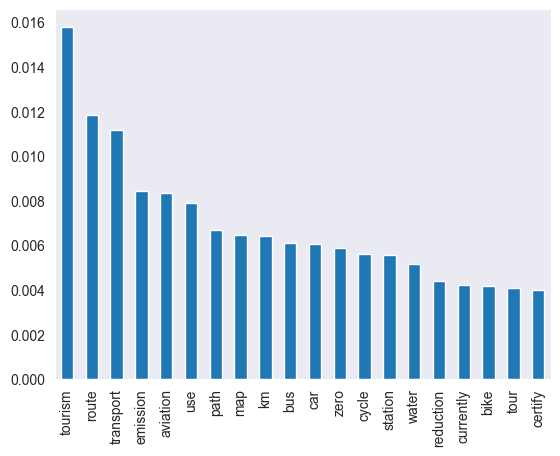

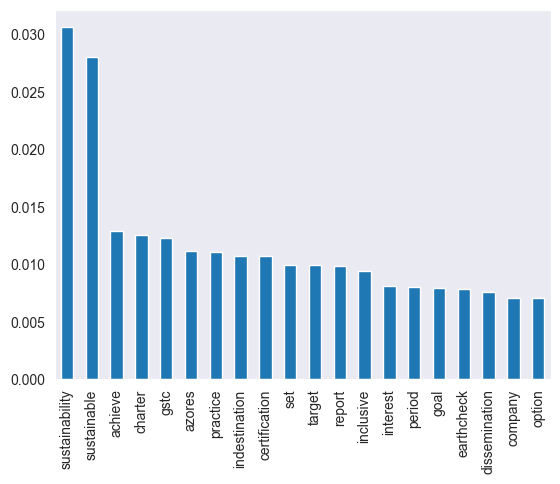

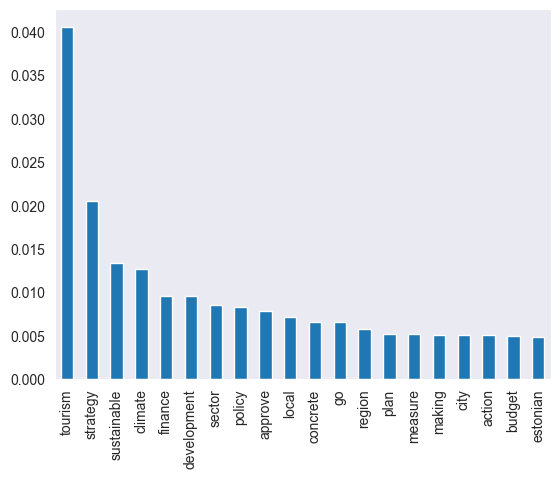

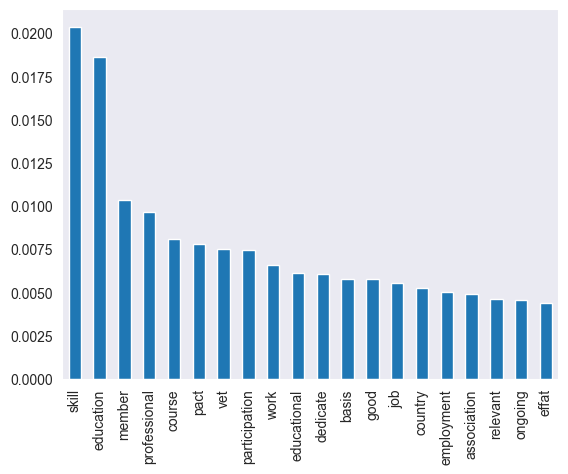

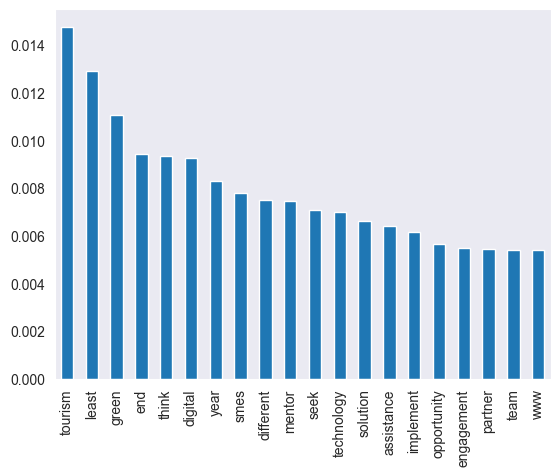

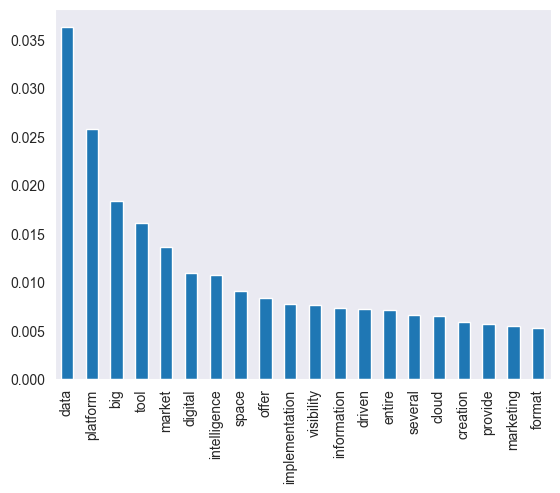

In [174]:
from sklearn.ensemble import RandomForestClassifier

# 1° Create 1 binary vector for each cluster
def binaryClass(x, group):
    binaryVec = []

    for cluster in x["Cluster"]:

        if cluster == group:
            binaryVec.append(1)
        else:
            binaryVec.append(0)

    return binaryVec

def DiscriWordsRF(data, cluster):

    data = data.copy()
    data["Cluster"] = cluster

    X, Y = data.loc[:, data.columns != "Cluster"], data["Cluster"]
    
    rf = RandomForestClassifier()
    rf.fit(X, Y)

    feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

    # Plot a simple bar chart
    feature_importances[:20].plot.bar()
    plt.show()

for i in range(6):

    DiscriWordsRF(df_tfidfvect, binaryClass(df_tfidfvect, i))



Results of hclusters

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_18612\2430742741.py:11: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


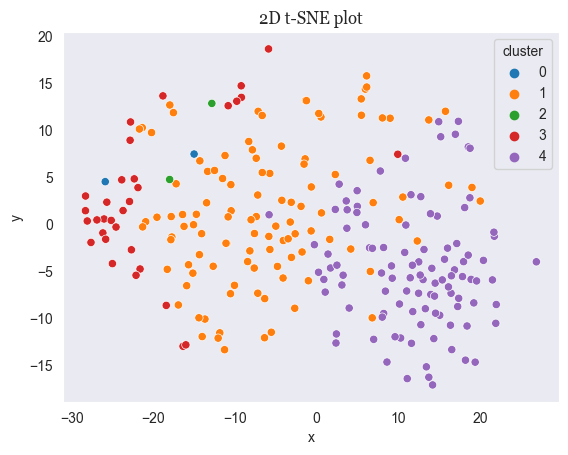

In [29]:
df = pd.DataFrame()
# Hierachical clustering model
hc = AgglomerativeClustering(n_clusters = 5)
# Fit and predict on the data
y_hc = hc.fit_predict(x)
# Save the predictions as a column
df['y_hc']=y_hc

ClusterPlot(results, y_hc)

Results of GaussianMixture

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_18612\2430742741.py:11: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


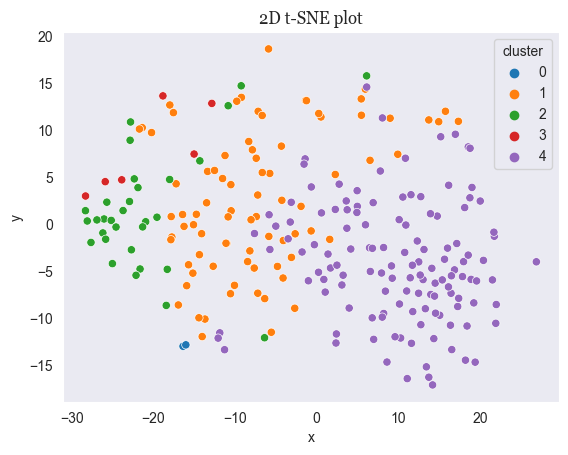

In [30]:
# Fit the GMM model
gmm = GaussianMixture(n_components=5, n_init=5, random_state=42)
# Fit and predict on the data
y_gmm = gmm.fit_predict(x)
# Save the prediction as a column
df['y_gmm']=y_gmm

ClusterPlot(results, y_gmm)

Results of DBSCAN

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_18612\2430742741.py:11: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(


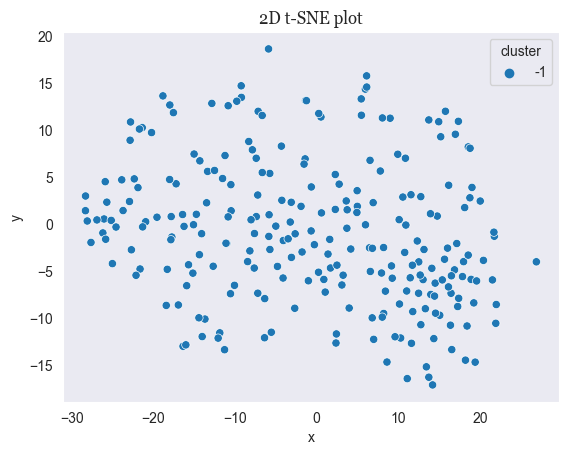

In [31]:
# Fit the DBSCAN model
dbscan = DBSCAN(eps=0.8, min_samples=5) 
# Fit and predict on the data
y_dbscan = dbscan.fit_predict(x)
# Save the prediction as a column
df['y_dbscan'] = y_dbscan

ClusterPlot(results, y_dbscan)

### Topic by Topic

In [54]:
def KMeansClust(x, n):
    
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit_predict(x)

    return clusters

def HClust(x, n): 
    
    # Hierachical clustering model
    hc = AgglomerativeClustering(n_clusters = n)
    # Fit and predict on the data
    yHC = hc.fit_predict(x)
    
    return yHC


def GaussianClust(x, n):
    # Fit the GMM model
    gmm = GaussianMixture(n_components=n, n_init=5, random_state=42)
    # Fit and predict on the data
    yGMM = gmm.fit_predict(x)

    return yGMM

def DBSCANClust(x, n):
    # Fit the DBSCAN model
    dbscan = DBSCAN(eps=0.8, min_samples=5) 
    # Fit and predict on the data
    yDBSCAN = dbscan.fit_predict(x)

    return yDBSCAN

In [ ]:
KMeansClust(IndexedData.loc[:, IndexedData.columns != "Topic"], 5)